<a href="https://www.kaggle.com/code/rkmaurya93/loan-payback?scriptVersionId=272649026" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/playground-series-s5e11'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e11/sample_submission.csv
/kaggle/input/playground-series-s5e11/train.csv
/kaggle/input/playground-series-s5e11/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s5e11/train.csv',index_col=0)

In [3]:
df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [4]:
df.columns

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'gender', 'marital_status', 'education_level',
       'employment_status', 'loan_purpose', 'grade_subgrade',
       'loan_paid_back'],
      dtype='object')

In [5]:
df.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [6]:
df.shape

(593994, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


# Categorical columns:

In [8]:
categorical_cols=df.select_dtypes('object').columns

In [9]:
categorical_cols

Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')

In [10]:
df[categorical_cols].head()

,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
id,,,,,,
0,Female,Single,High School,Self-employed,Other,C3
1,Male,Married,Master's,Employed,Debt consolidation,D3
2,Male,Single,High School,Employed,Debt consolidation,C5
3,Female,Single,High School,Employed,Debt consolidation,F1
4,Male,Married,High School,Employed,Other,D1


In [11]:
for i in categorical_cols:
    print(i)
    print(df[i].nunique())

gender
3
marital_status
4
education_level
5
employment_status
5
loan_purpose
8
grade_subgrade
30


# plotting the relation between categorical_cols and loan_payback

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

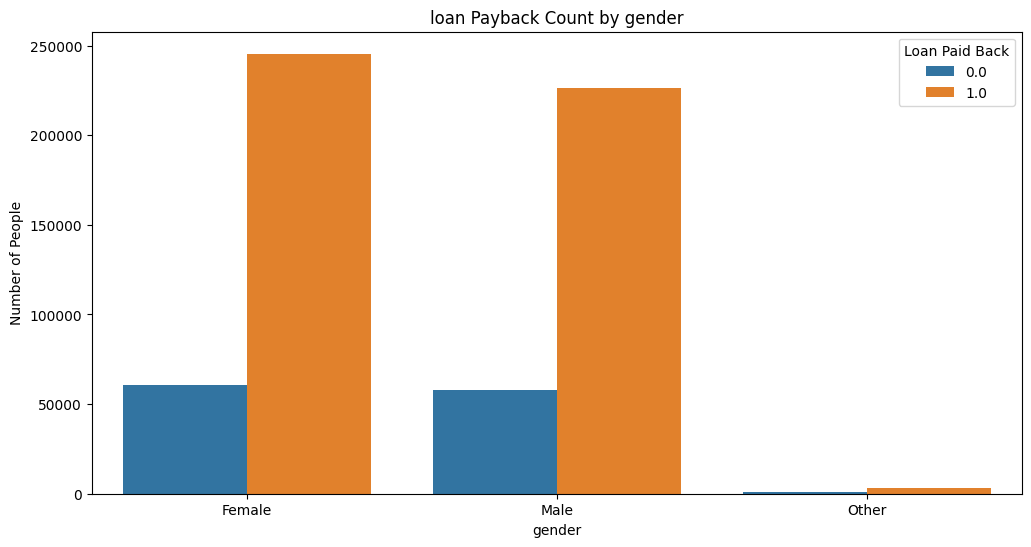

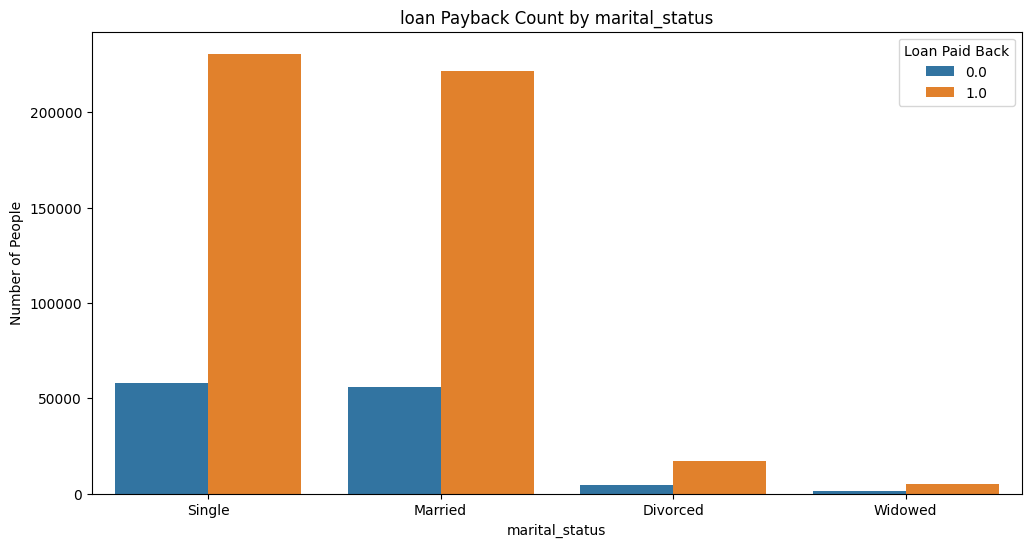

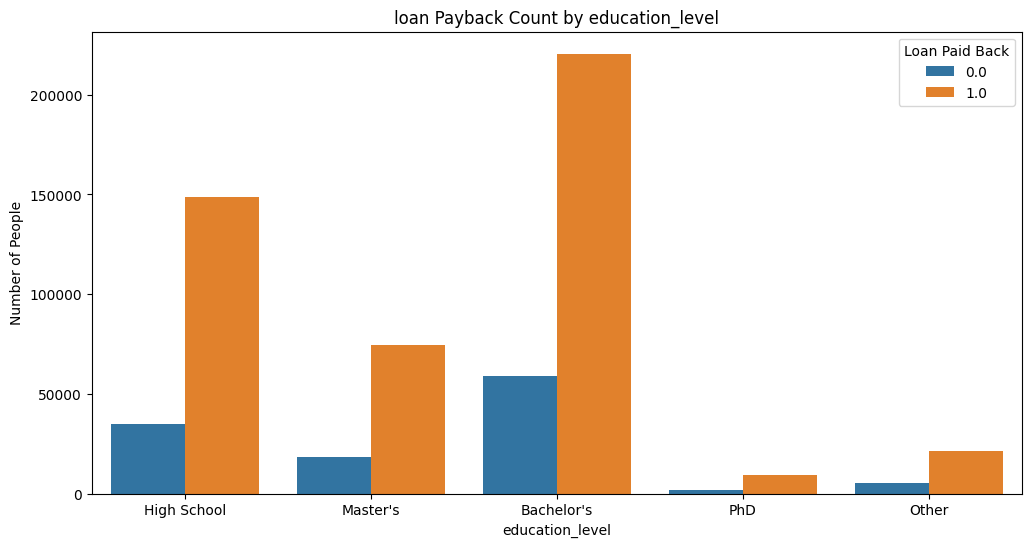

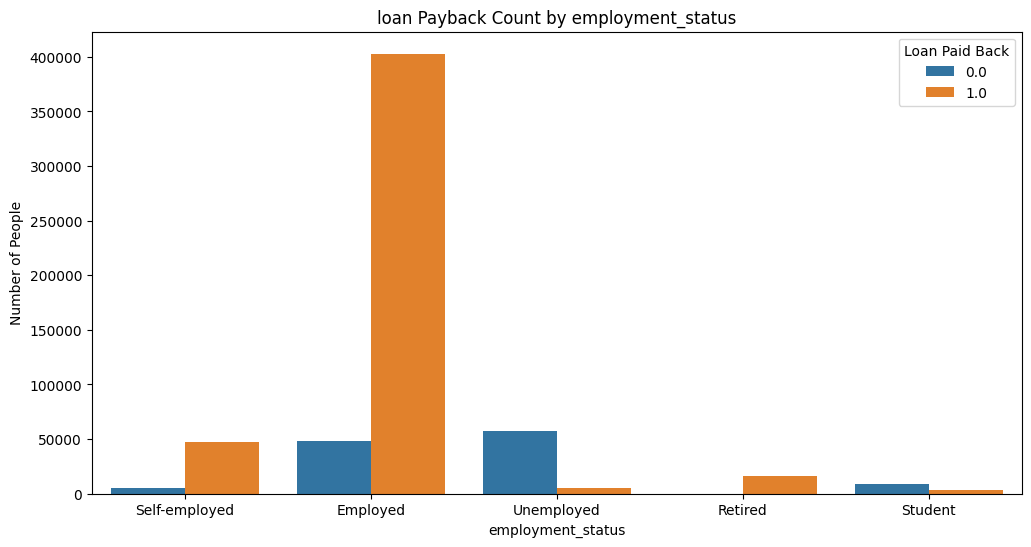

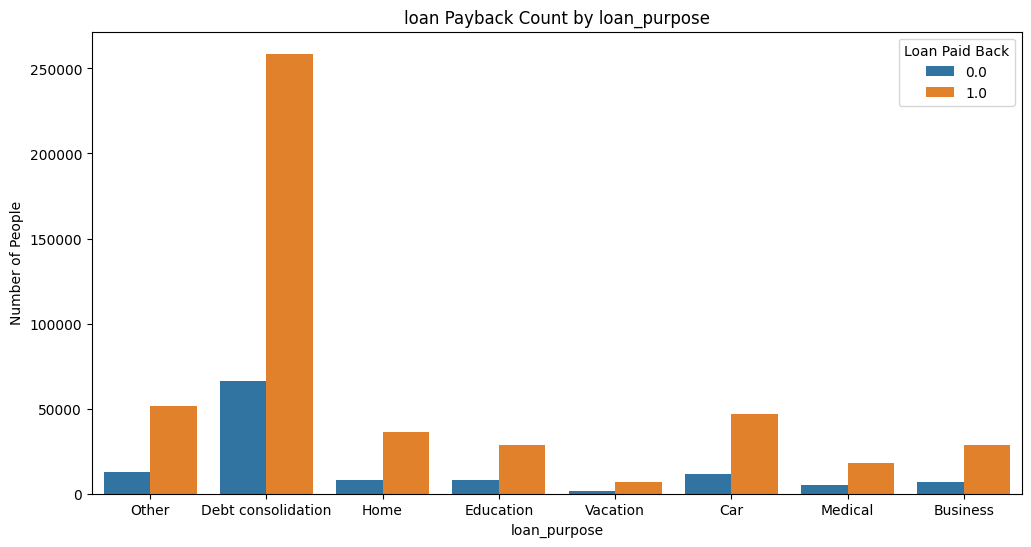

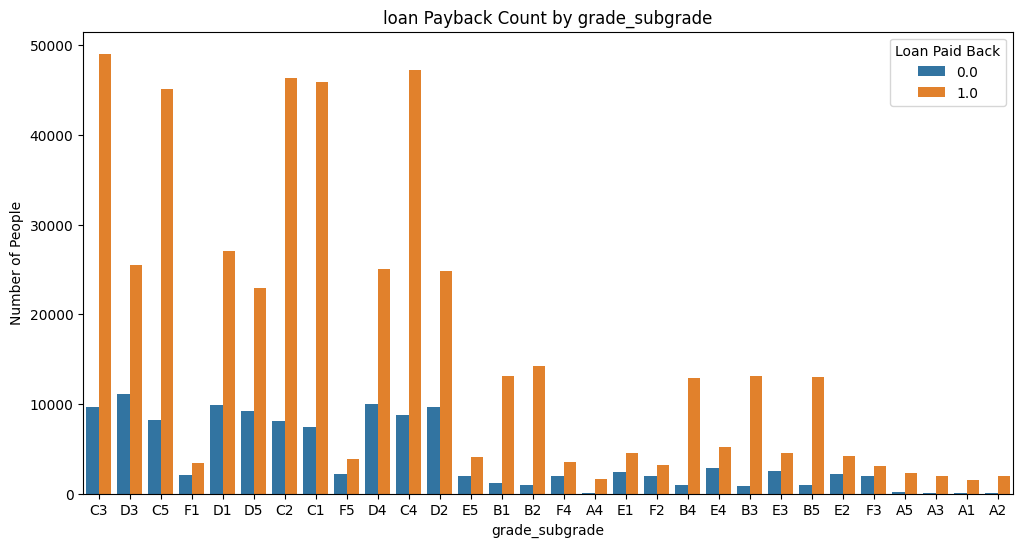

In [13]:
for i in categorical_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(data=df,x=i,hue='loan_paid_back')
    plt.title(f'loan Payback Count by {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('Number of People')
    plt.legend(title='Loan Paid Back')
    plt.show()

### Encoding the categorical Values:

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
oe=OrdinalEncoder()

In [16]:
df[categorical_cols]=oe.fit_transform(df[categorical_cols])

In [17]:
df[categorical_cols].head()

,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
id,,,,,,
0,0.0,2.0,1.0,2.0,6.0,12.0
1,1.0,1.0,2.0,0.0,2.0,17.0
2,1.0,2.0,1.0,0.0,2.0,14.0
3,0.0,2.0,1.0,0.0,2.0,25.0
4,1.0,1.0,1.0,0.0,6.0,15.0


# Numerical_cols:

In [18]:
numerical_cols=df.select_dtypes('float64','int64').columns

In [19]:
numerical_cols

Index(['annual_income', 'debt_to_income_ratio', 'loan_amount', 'interest_rate',
       'gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [20]:
df[numerical_cols].head()

,annual_income,debt_to_income_ratio,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,
0,29367.99,0.084,2528.42,13.67,0.0,2.0,1.0,2.0,6.0,12.0,1.0
1,22108.02,0.166,4593.10,12.92,1.0,1.0,2.0,0.0,2.0,17.0,0.0
2,49566.20,0.097,17005.15,9.76,1.0,2.0,1.0,0.0,2.0,14.0,1.0
3,46858.25,0.065,4682.48,16.10,0.0,2.0,1.0,0.0,2.0,25.0,1.0
4,25496.70,0.053,12184.43,10.21,1.0,1.0,1.0,0.0,6.0,15.0,1.0


In [21]:
for i in numerical_cols:
        print(i)
        print(df[i].nunique())

annual_income
119728
debt_to_income_ratio
526
loan_amount
111570
interest_rate
1454
gender
3
marital_status
4
education_level
5
employment_status
5
loan_purpose
8
grade_subgrade
30
loan_paid_back
2


annual_income


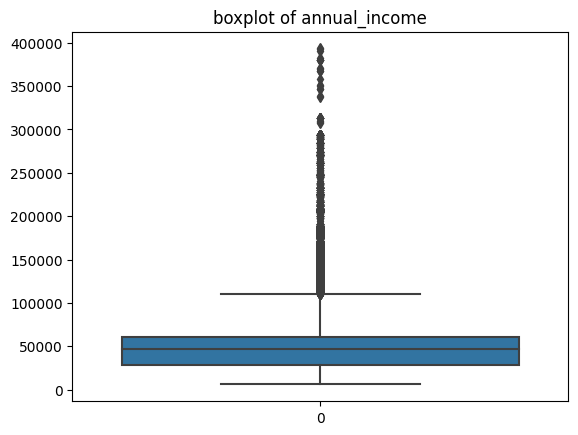

debt_to_income_ratio


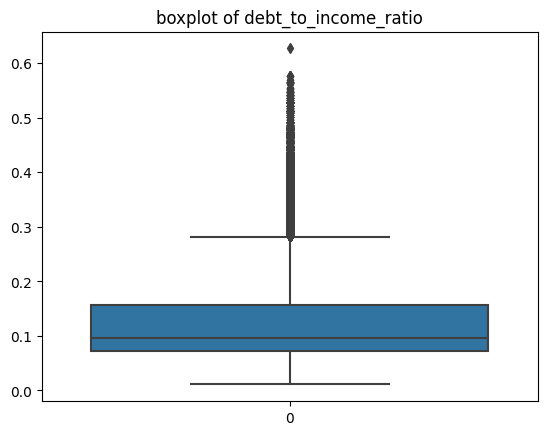

loan_amount


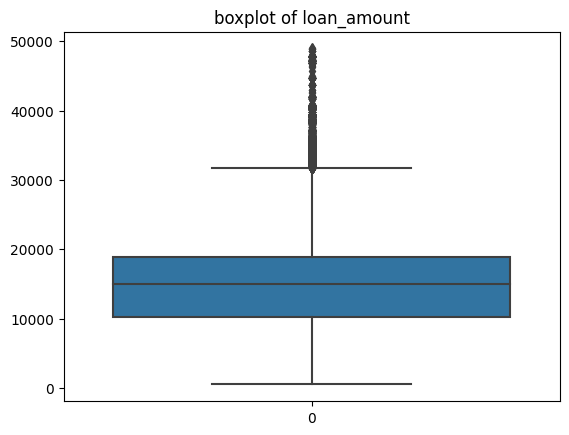

interest_rate


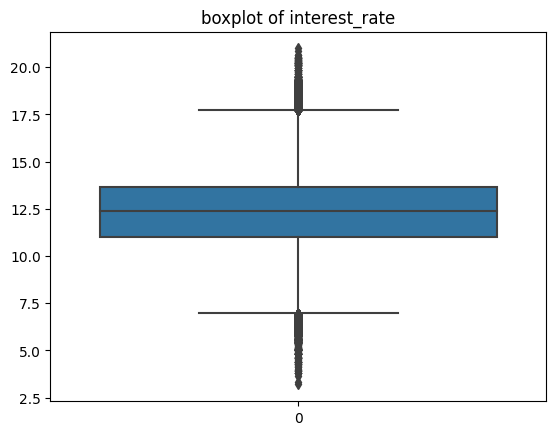

gender


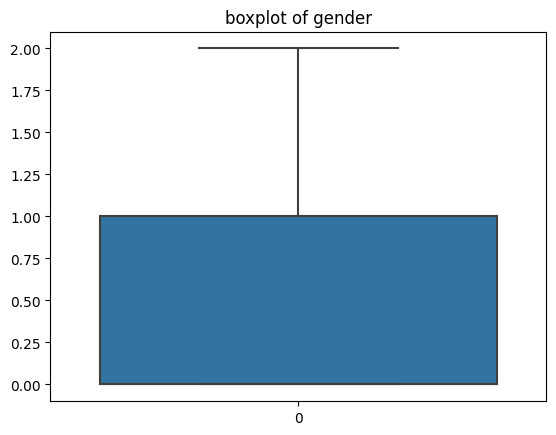

marital_status


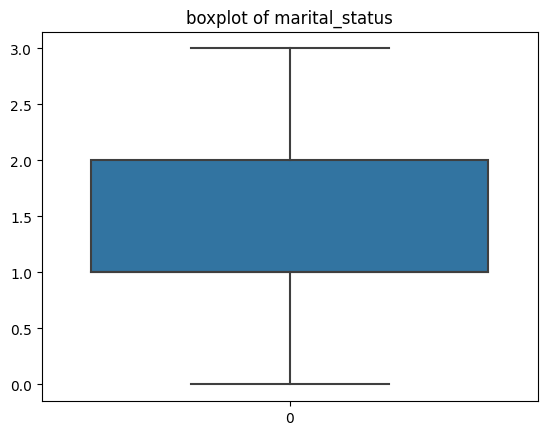

education_level


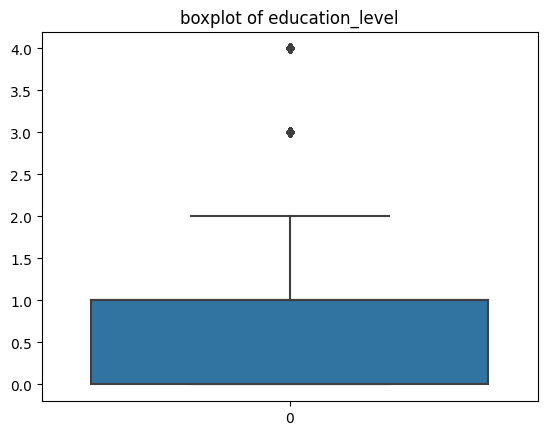

employment_status


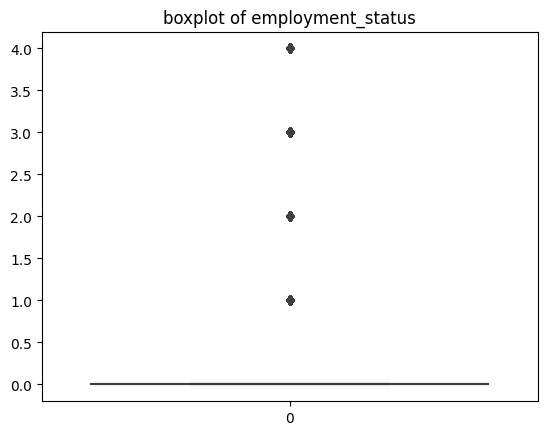

loan_purpose


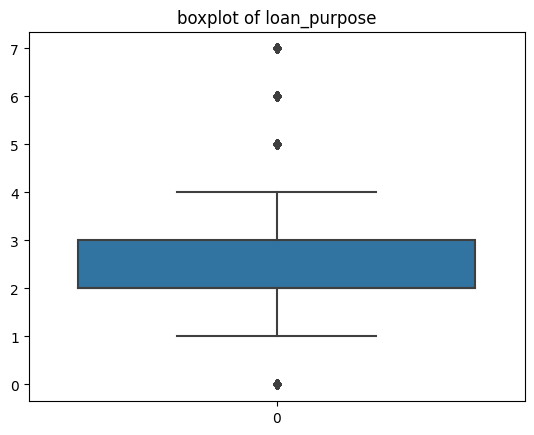

grade_subgrade


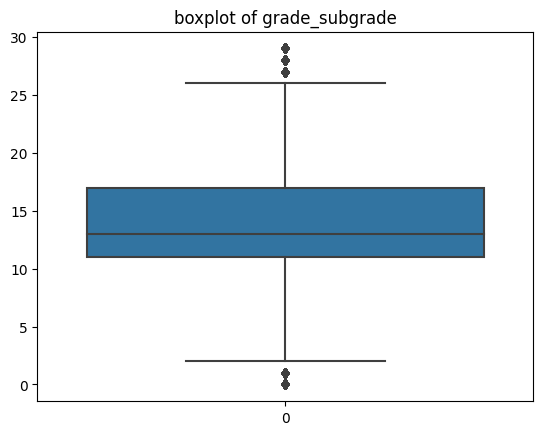

loan_paid_back


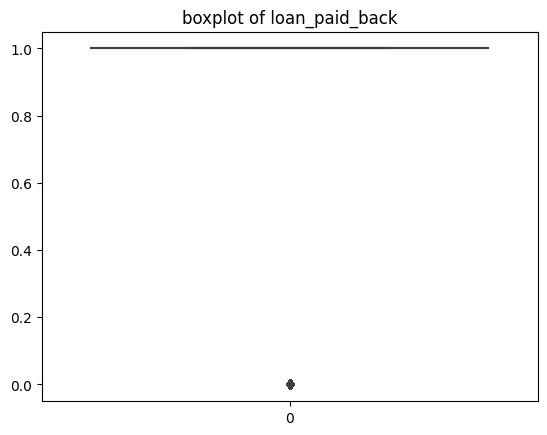

In [22]:
for i in numerical_cols:
    print(i)
    sns.boxplot(data=df[i])
    plt.title(f'boxplot of {i}')
    plt.show()

# Visualizing the correlation with payback:

In [23]:
df.corr()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
annual_income,1.000000,0.000553,0.001509,-0.003407,-0.002507,0.002644,-0.000425,0.005617,-0.001569,-0.003772,-0.001562,0.006326
debt_to_income_ratio,0.000553,1.000000,-0.061617,-0.008236,0.030316,0.003269,0.004278,-0.006468,0.153695,0.003650,0.057069,-0.335680
credit_score,0.001509,-0.061617,1.000000,-0.005761,-0.538335,-0.004960,0.006151,0.002663,-0.079260,-0.004897,-0.907313,0.234560
loan_amount,-0.003407,-0.008236,-0.005761,1.000000,-0.001174,-0.003444,-0.000124,-0.005158,0.005751,0.004105,0.003789,-0.003762
interest_rate,-0.002507,0.030316,-0.538335,-0.001174,1.000000,0.002967,-0.002377,0.000537,0.040861,0.005035,0.488369,-0.131184
gender,0.002644,0.003269,-0.004960,-0.003444,0.002967,1.000000,-0.001597,0.001612,0.001304,0.002963,0.002879,-0.007356
marital_status,-0.000425,0.004278,0.006151,-0.000124,-0.002377,-0.001597,1.000000,0.010291,0.003035,0.006741,-0.005093,-0.000404
education_level,0.005617,-0.006468,0.002663,-0.005158,0.000537,0.001612,0.010291,1.000000,-0.014258,-0.006459,-0.002642,0.018781
employment_status,-0.001569,0.153695,-0.079260,0.005751,0.040861,0.001304,0.003035,-0.014258,1.000000,0.003148,0.069464,-0.585304
loan_purpose,-0.003772,0.003650,-0.004897,0.004105,0.005035,0.002963,0.006741,-0.006459,0.003148,1.000000,0.002574,-0.000973


In [24]:
corr_matrix=df.corr()

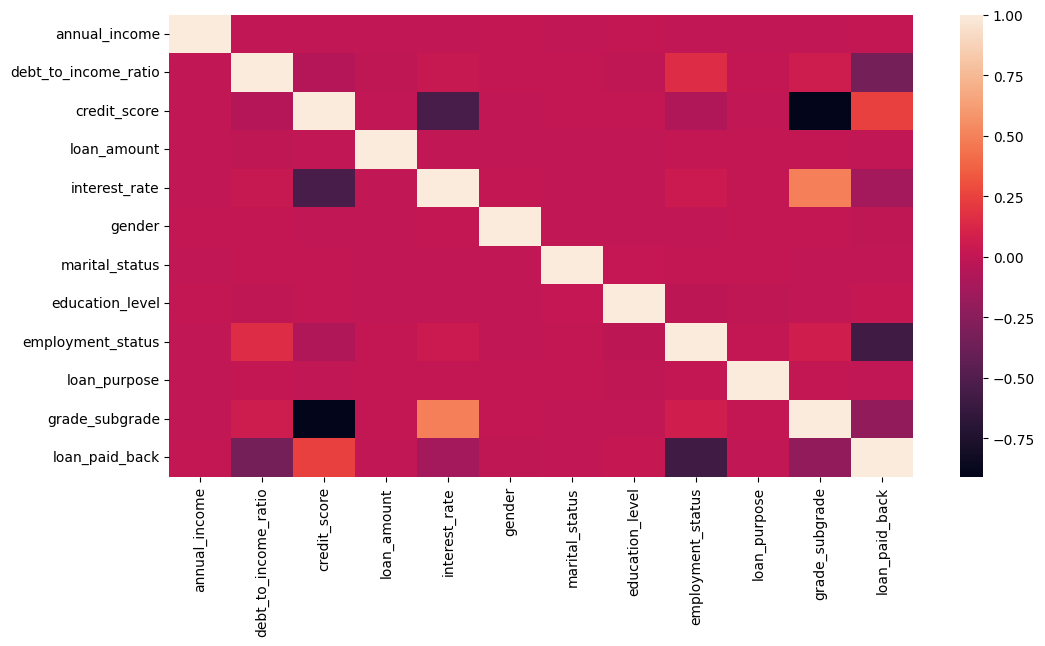

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix)
plt.show()

# Splitting the data for training and testing:

In [26]:
x=df.drop('loan_paid_back',axis=1)
y=df['loan_paid_back']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
id,,,,,,,,,,,
119010,17165.69,0.071,719,19154.78,9.31,1.0,1.0,0.0,0.0,2.0,14.0
165500,87929.11,0.071,728,7367.61,11.94,0.0,2.0,1.0,0.0,2.0,11.0
290800,37254.01,0.080,654,2672.78,12.52,0.0,2.0,0.0,0.0,6.0,18.0
184308,25863.67,0.068,732,10703.41,10.71,1.0,1.0,3.0,0.0,6.0,14.0
137347,153072.69,0.090,668,7782.41,10.59,0.0,1.0,2.0,4.0,1.0,16.0


# Training the model using XGBoost

In [30]:
from xgboost import XGBClassifier

In [31]:
xgb_model=XGBClassifier()

In [32]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred=xgb_model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_pred,y_test)

0.9045699037870689

# Working with test data:

In [36]:
df_test=pd.read_csv('/kaggle/input/playground-series-s5e11/test.csv',index_col=0)

In [37]:
df_test.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
id,,,,,,,,,,,
593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


In [38]:
df.shape

(593994, 12)

In [39]:
df.isnull().sum()

annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [40]:
df_test[categorical_cols]=oe.transform(df_test[categorical_cols])

In [41]:
df_test.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
id,,,,,,,,,,,
593994,28781.05,0.049,626,11461.42,14.73,0.0,2.0,1.0,0.0,6.0,19.0
593995,46626.39,0.093,732,15492.25,12.85,0.0,1.0,2.0,0.0,6.0,10.0
593996,54954.89,0.367,611,3796.41,13.29,1.0,2.0,0.0,0.0,2.0,15.0
593997,25644.63,0.110,671,6574.30,9.57,0.0,2.0,0.0,0.0,2.0,12.0
593998,25169.64,0.081,688,17696.89,12.80,0.0,1.0,4.0,0.0,0.0,10.0


In [42]:
test_pred=xgb_model.predict(df_test)

In [43]:
test_pred

array([1, 1, 0, ..., 1, 1, 1])